In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [3]:
def read_cred():
    f = open("../../../cred.txt", "r")
    cred = f.read()
    f.close()
    return cred

In [4]:
def get_OI(url,start,end,interval='PT1M',tag='xx',auth='xx',hS='00',hF='23'):
	url_all =url+'data-reference='+tag+'&aggregation=TIME'+'&aggregation-function=MEAN'+"&from="+start+"T"+hS+"%3A00%3A00.000Z&to="+end+"T"+hF+"%3A59%3A59.000Z&aggregation-period="+interval
	d_data = pd.read_json(url_all,storage_options={ 'Authorization': 'basic '+ auth})
	# print(d_data['values'][0])
	arr = np.asarray(np.asarray(d_data['values'])[0])
	return d_data['values'][0]

In [5]:
def get_data(tags):
    liste = list(range(0))
    for tag in tags:
        data = get_OI(urlBase,start_date,end_date,resolution,tag,credentials,'00','23')
        df = pd.DataFrame(data)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        df = df.rename(columns={'value':tag})
        liste.append(df)
    return liste

In [6]:
def merge_data(liste):
    df = reduce(lambda left,right : pd.merge(left, right,left_index=True,right_index=True,how='outer'),liste)
    return df

In [7]:
# for tag in tags:
#     plt.figure(figsize=(8,6))
# # plt.plot(result[tags[0]],label=tags[0])
#     plt.subplot(121)
#     plt.scatter(result.index ,result[tag],label=tag, c='b', alpha=0.3)
#     plt.legend()
#     plt.subplot(122)
#     sns.histplot(result[tag],label=tag,kde=True,common_norm=True)
#     plt.legend()

# Filtre

In [15]:
def filtering(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['S-FCX69604']>10000)]
    df = df[(df['S-FQ31016']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [16]:
def get_perf(row):
    crit = 'ROC_Bruit_160Hz'
    if row['ROC_Bruit_160Hz'] > 75:
        ret=10
    elif row['ROC_Bruit_160Hz']>73:
        ret=9
    elif row['ROC_Bruit_160Hz']>71:
        ret=8
    elif row['ROC_Bruit_160Hz']>69:
        ret=7
    elif row['ROC_Bruit_160Hz']>67:
        ret=6
    elif row['ROC_Bruit_160Hz']>65:
        ret=5
    elif row['ROC_Bruit_160Hz']>63:
        ret=4
    elif row['ROC_Bruit_160Hz']>61:
        ret=3
    elif row['ROC_Bruit_160Hz']>59:
        ret=2
    elif row['ROC_Bruit_160Hz']>57:
        ret=1
    else:
        ret =0
    return ret   

Variables Globales

In [10]:
urlBase = 'https://oianalytics-100.optimistik.fr/api/oianalytics/time-values/query?'
credentials = read_cred()

Variables Spécifiques

In [11]:
start_date = '2022-01-01'
end_date = '2022-03-01'
resolution = 'PT30M'
tags = ['3B-T99994','ROC_Bruit_160Hz','5A-Q98901B','S-FCX69604','ROC_S1_Air_GN','S-FCQX69121','S-S69615','S-FCX69606','S-FQ31016','S-F69703','5A-Q98901A']
#tags = ['E-T15223','E-T18223','3B-T99994','E-FC16325','E-FCS14325','E-FCS12085','E-FS31053','E-FC33005','E-FQ41504','E-QUR-E2']
#tags = ['E-T15223','E-T18223','E-FCS14325','E-FC16325','E-FCS12085','E-LS18603','E-LC18604','E-LS15603','E-LC15604','E-FS31053','E-PD15010','E-PD18010','3B-T99994','E-QUR-E2','ROC_E2_Prod_MMP_brut','E-FQ41504','E-TC18202','E-TC15202']

In [17]:
df_list = get_data(tags)
data = merge_data(df_list)
result = data.copy()
result = filtering(result)
result['perf'] = result.apply(get_perf,axis=1)
result.describe()

,3B-T99994,ROC_Bruit_160Hz,5A-Q98901B,S-FCX69604,ROC_S1_Air_GN,S-FCQX69121,S-S69615,S-FCX69606,S-FQ31016,S-F69703,5A-Q98901A,perf
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,7.897625,68.782545,0.054836,15869.680203,20.997156,755.767939,1225.141572,7619.206583,27512.441867,5276.107102,0.201670,6.389583
std,4.211399,2.493387,0.012076,1410.759546,0.128381,67.082215,60.664236,1207.009098,4488.024974,902.673870,0.059344,1.273683
min,-1.103999,62.204198,0.026656,10169.805667,19.361439,470.899933,1128.739333,5200.249667,10933.866667,975.015000,0.118564,3.000000
25%,4.999294,67.089160,0.046682,14898.160833,20.970251,708.572925,1155.028000,6509.967083,26909.000000,4766.856917,0.158667,6.000000
50%,8.270373,68.582479,0.052856,15953.146667,20.997614,759.943933,1264.556833,7570.574333,29235.123333,5255.911500,0.182661,6.000000
75%,10.818839,70.165533,0.060242,16851.274167,21.024391,802.914558,1277.614417,8522.212083,30413.723333,5814.220000,0.228952,7.000000
max,21.176213,77.312716,0.106725,20296.810000,21.906445,937.826700,1317.854667,12314.990000,31060.530000,7623.484333,0.498601,10.000000


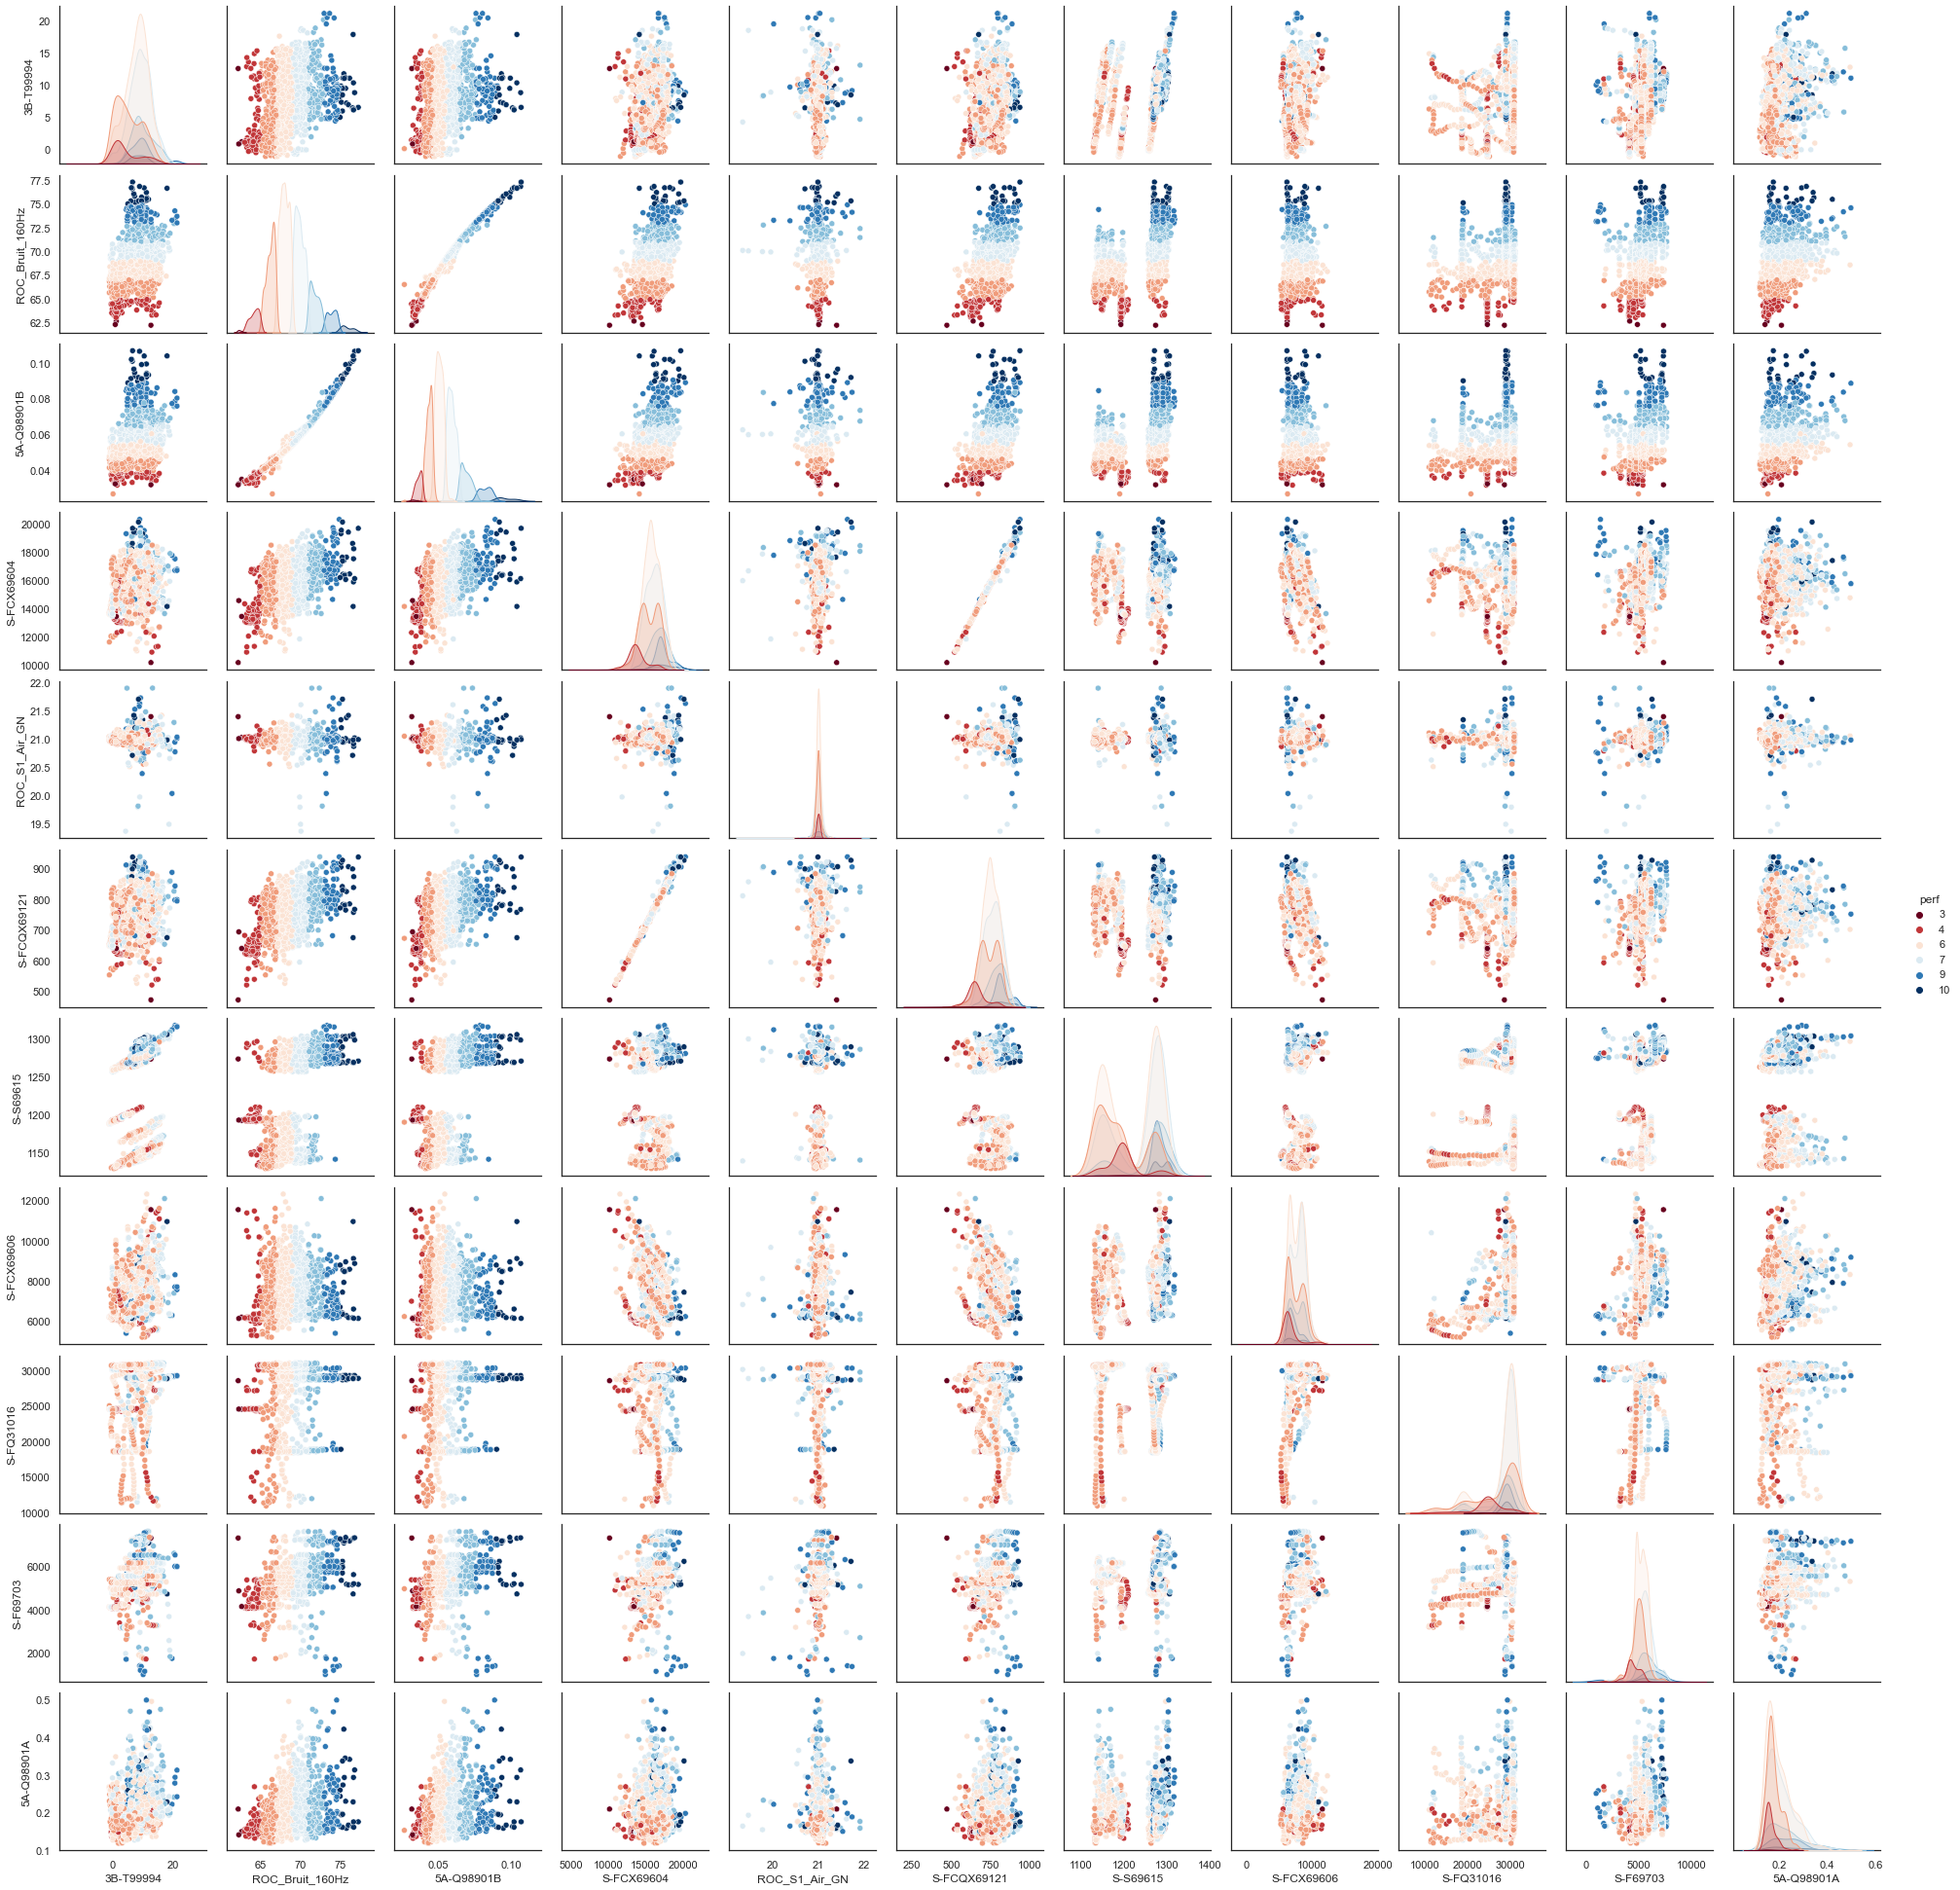

In [18]:
# sns.set_theme(style="ticks")
sns.set_theme(style='white',palette='Blues')
sns.color_palette("tab10")
sns.pairplot(data=result, hue='perf',palette='RdBu') 